<a href="https://colab.research.google.com/github/ngupta10/General_DataAnalyst/blob/master/Sentiment_Analyzer_(ML_Naive_Bayes_Binary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://itnext.io/how-to-create-a-sentiment-analyzer-with-text-classification-python-ai-f3a5d10922c5

In [0]:
##Importing all libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import pandas
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [0]:
##open all data sets and merge them as one

def get_all_data():
    root = "/Data/"

    with open(root + "imdb_labelled.txt", "r") as text_file:
        data = text_file.read().split('\n')
         
    with open(root + "amazon_cells_labelled.txt", "r") as text_file:
        data += text_file.read().split('\n')

    with open(root + "yelp_labelled.txt", "r") as text_file:
        data += text_file.read().split('\n')

    return data

In [0]:
## Data Pre-processing

def preprocessing_data(data):
    processing_data = []
    for single_data in data:
        if len(single_data.split("\t")) == 2 and single_data.split("\t")[1] != "":
            processing_data.append(single_data.split("\t"))

    return processing_data


The last task to finish the first step is to split the data set into two different sets, one for each of the next process: training and evaluation.
We need to use a ratio to split the data out, usually it can variate between 70–80% for training and 30–20% for evaluation, but in this particular case, we’ll use 75% for training, so, let’s split it:

In [0]:
## Split data into training and evalyation set

def split_data(data):
    total = len(data)
    training_ratio = 0.75
    training_data = []
    evaluation_data = []

    for indice in range(0, total):
        if indice < total * training_ratio:
            training_data.append(data[indice])
        else:
            evaluation_data.append(data[indice])

    return training_data, evaluation_data

In [0]:
## Complete Pre-processing of data

def preprocessing_step():
    data = get_all_data()
    processing_data = preprocessing_data(data)

    return split_data(processing_data)

In [0]:
## Get Pre-processes data


def preprocessing_step():
    data = get_all_data()
    processing_data = preprocessing_data(data)

    return split_data(processing_data)

split our training data set in two different lists, one for the sentences and other for the results.
Then, let’s vectorize the sentence by using fit_transform function and finally let’s return the result of a BernoulliNB().fit function call.

In [0]:
def training_step(data, vectorizer):
    training_text = [data[0] for data in data]
    training_result = [data[1] for data in data]

    training_text = vectorizer.fit_transform(training_text)

    return BernoulliNB().fit(training_text, training_result)

In [0]:
training_data, evaluation_data = preprocessing_step()
vectorizer = CountVectorizer(binary = 'true')
classifier = training_step(training_data, vectorizer)
#result = classifier.predict(vectorizer.transform(["I love this movie!"]))


def analyse_text(classifier, vectorizer, text):
    return text, classifier.predict(vectorizer.transform([text]))
  
def print_result(result):
    text, analysis_result = result
    print_text = "Positive" if analysis_result[0] == '1' else "Negative"
    print(text, ":", print_text)

In [0]:
## Results

print_result( analyse_text(classifier, vectorizer,"all good thanks"))
print_result( analyse_text(classifier, vectorizer,"close the account"))
print_result( analyse_text(classifier, vectorizer,"Stop the payments"))


all good thanks : Positive
close the account : Negative
Stop the payments : Negative


In [0]:
## Evaluation

def simple_evaluation(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    evaluation_result   = [evaluation_data[1] for evaluation_data in evaluation_data]

    total = len(evaluation_text)
    corrects = 0
    for index in range(0, total):
        analysis_result = analyse_text(classifier, vectorizer, evaluation_text[index])
        text, result = analysis_result
        corrects += 1 if result[0] == evaluation_result[index] else 0

    return corrects * 100 / total

simple_evaluation(evaluation_data)

82.0

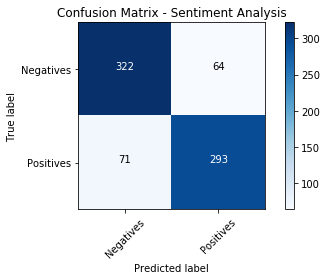

In [0]:
## Confusion Matrix

def create_confusion_matrix(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    actual_result       = [evaluation_data[1] for evaluation_data in evaluation_data]
    prediction_result   = []
    for text in evaluation_text:
        analysis_result = analyse_text(classifier, vectorizer, text)
        prediction_result.append(analysis_result[1][0])
    
    matrix = confusion_matrix(actual_result, prediction_result)
    return matrix

confusion_matrix_result = create_confusion_matrix(evaluation_data)

pandas.DataFrame(
    confusion_matrix_result, 
    columns=["Negatives", "Positives"],
    index=["Negatives", "Positives"])

classes = ["Negatives", "Positives"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Sentiment Analysis")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

there are a total of 386 negatives sentences and a total of 364 of negatives, totalizing 750 sentences, which is 25% of the 3000 total sentences.
Of this 386 negatives sentences 322 were classified correctly while 64(about 16.5%) were classified as positive sentence, creating some false positives. On other hand there’s 293 positives sentences classified correctly and 71(about 24%) false negatives.